In [1]:
import numpy as np
import pandas as pd

df = pd.read_table('test.dat', sep="\t")

energy = np.asarray(df[['       E']])
atomicmass = np.asarray(df[['A']])
charge = np.asarray(df[['Z']])
angle = np.asarray(df[['polar angle']])

chargeAngleBetweenZeroAndThrithyDeg = np.asarray(df[['Z', 'polar angle']])

import matplotlib.pyplot as plt

chargeAngleBetweenZeroAndThrithyDeg = np.asarray(list(filter(lambda x: x[1] < 30. and x[1] > 0., chargeAngleBetweenZeroAndThrithyDeg)))

angles = {}
multiplicity = {}

for elem in chargeAngleBetweenZeroAndThrithyDeg:
    angles[elem[0]] = []
    multiplicity[elem[0]] = 0
    
for elem in chargeAngleBetweenZeroAndThrithyDeg:
    angles[elem[0]].append(elem[1])
    multiplicity[elem[0]] += 1

meanAngles = {}
varAngles = {}

for chrge in list(angles.keys()):
    meanAngles[chrge] = np.mean(angles[chrge])
    varAngles[chrge] = np.var(angles[chrge])

plt.errorbar(np.array(list(angles.keys())),
            np.array(list(meanAngles.values())),
            np.array(list(varAngles.values())),
            marker='s', mfc='red',
         mec='green', ms=5, mew=2, lw=1, linestyle='None')

plt.xlim(0,40)
plt.ylim(-50,50)
plt.show()

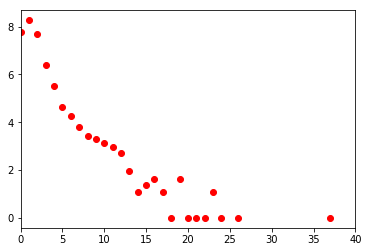

In [2]:
plt.plot(np.array(list(angles.keys())), np.log(np.array(list(multiplicity.values()))), 'ro')
plt.xlim(0,40)
plt.show()

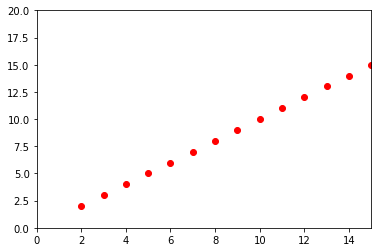

In [6]:
energies = {}
meanEnergies = {}

atomicmass = atomicmass.reshape(len(charge),)

for i in range(0, len(atomicmass)):
    energies[atomicmass[i]] = []
    meanEnergies[atomicmass[i]] = 0

for i in range(0,len(atomicmass)):
    energies[atomicmass[i]].append(energy[i])
    
meanergies = np.asarray(list(map(lambda x: np.mean(x), energies)))

plt.plot(list(energies.keys()), meanergies, 'ro')
plt.xlim(0,15)
plt.ylim(0, 20)
plt.show()